## Thư viện

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
from glob import glob

In [129]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Đọc file âm thanh (wav)

In [2]:
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [126]:
multiple_sentences = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/multiple_sentences/S_01_4002_VE1.wav')
one_sentence = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/one_sentence/S_01_4001_VE.wav')

In [127]:
wave = load_wav_16k_mono(multiple_sentences)
nwave = load_wav_16k_mono(one_sentence)

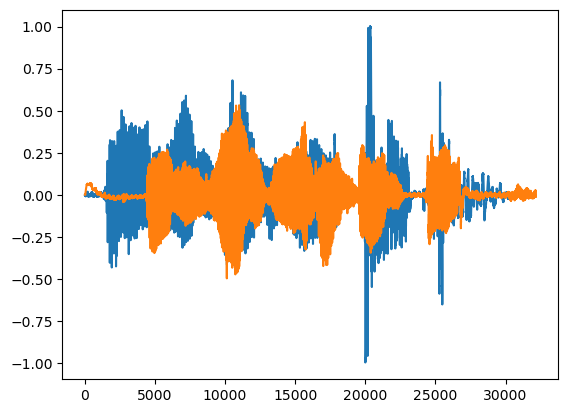

In [128]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

## Load dữ liệu

In [3]:
FILE_16 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/16')
FILE_17 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/17')
FILE_18 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/18')
FILE_19 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/19')
FILE_20 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/20')
FILE_21 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/21')
FILE_22 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/22')
FILE_23 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/23')
FILE_24 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/24')
FILE_25 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/25')
FILE_26 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/26')
FILE_28 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Train/28')

In [119]:
T_16 = glob(FILE_16+'/*.wav')
T_18 = glob(FILE_18+'/*.wav')
T_19 = glob(FILE_19+'/*.wav')
T_17 = glob(FILE_17+'/*.wav')
T_20 = glob(FILE_20+'/*.wav')
T_21 = glob(FILE_21+'/*.wav')
T_22 = glob(FILE_22+'/*.wav')
T_23 = glob(FILE_23+'/*.wav')
T_24 = glob(FILE_24+'/*.wav')
T_25 = glob(FILE_25+'/*.wav')
T_26 = glob(FILE_26+'/*.wav')
T_28 = glob(FILE_28+'/*.wav')
Train_image = np.concatenate([T_16, T_17, T_18, T_19, T_20, T_21, T_22, T_23, T_24, T_25, T_26, T_28])
Train_image.shape

(3698,)

In [117]:
L_16 = np.full(len(T_16),0).astype(str)
L_17 = np.full(len(T_17),1).astype(str)
L_18 = np.full(len(T_18),2).astype(str)
L_19 = np.full(len(T_19),3).astype(str)
L_20 = np.full(len(T_20),4).astype(str)
L_21 = np.full(len(T_21),5).astype(str)
L_22 = np.full(len(T_22),6).astype(str)
L_23 = np.full(len(T_23),7).astype(str)
L_24 = np.full(len(T_24),8).astype(str)
L_25 = np.full(len(T_25),9).astype(str)
L_26 = np.full(len(T_26),10).astype(str)
L_28 = np.full(len(T_28),11).astype(str)
Train_labels = np.concatenate([L_16, L_17, L_18, L_19, L_20, L_21, L_22, L_23, L_24, L_25, L_26, L_28])
Train_labels.shape

(3698,)

## Chuyển dữ liệu sang tensorflow data

In [120]:
Train_image = tf.data.Dataset.from_tensor_slices(Train_image)
Train_labels = tf.data.Dataset.from_tensor_slices(Train_labels)
data = tf.data.Dataset.zip((Train_image,Train_labels))

In [7]:
len(data)

3698

## Chuyển dữ liệu âm thanh sang dữ liệu ảnh

In [8]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [122]:
filepath, label = data.shuffle(buffer_size=1000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)

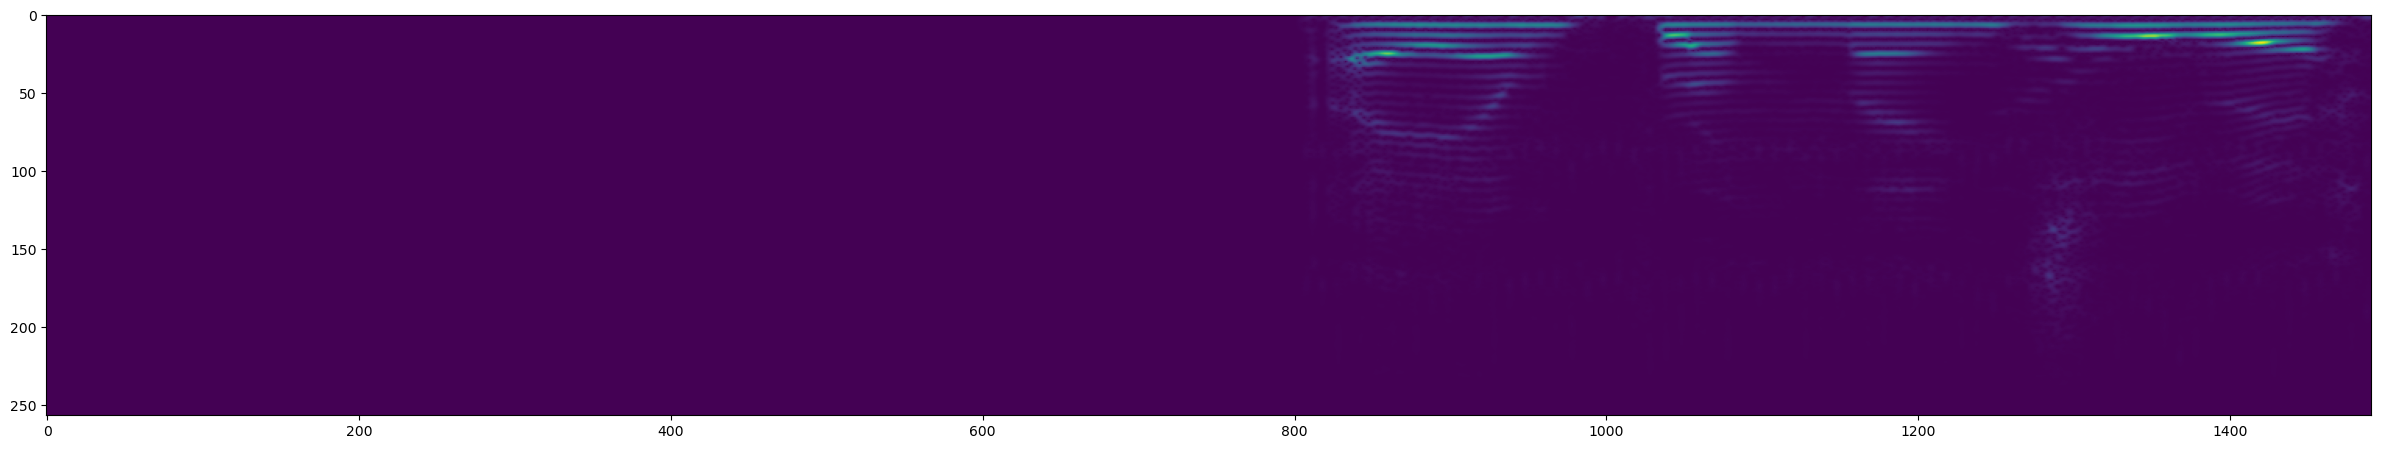

In [123]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

## Chuyển nhãn dữ liệu từ int sang One hot Encoding

In [9]:
def onehot(spectrogram, label):
    labels = tf.one_hot(int(label), depth=12)
    return spectrogram, labels

In [124]:
filepath, label = data.shuffle(buffer_size=1000).as_numpy_iterator().next()
spectrogram, label = onehot(filepath, label)

In [125]:
label

<tf.Tensor: shape=(12,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

## Chuyển và chia dữ liệu với tỷ lệ 7-3

In [10]:
data = data.map(preprocess)
data = data.map(onehot)

In [11]:
data = data.cache()
data = data.shuffle(buffer_size=4000)
data = data.batch(1)
data = data.prefetch(4)

In [12]:
len(data)

3698

In [14]:
for batch in data.take(1):
    s, l = batch
    print(l)
    print(s.shape)

tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 12), dtype=float32)
(1, 1491, 257, 1)


In [15]:
train = data.take(int(len(data)*.7))
test = data.skip(int(len(data)*.7)).take(int(len(data)*.3))

## Giải phóng ram

In [16]:
import gc
del data
gc.collect()

850

## Cấu hình model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(1, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 1)      10        
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 1)      10        
                                                                 
 flatten (Flatten)           (None, 376211)            0         
                                                                 
 dense (Dense)               (None, 64)                24077568  
                                                                 
 dense_1 (Dense)             (None, 12)                780       
                                                                 
Total params: 24,078,368
Trainable params: 24,078,368
Non-trainable params: 0
_________________________________________________________________


## Train model

In [ ]:
hist = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
2588/2588 [==============================] - 62s 23ms/step - loss: 0.3315 - recall: 0.0120 - precision: 0.1550 - val_loss: 0.2335 - val_recall: 0.0966 - val_precision: 0.9554
Epoch 2/10
2588/2588 [==============================] - 52s 20ms/step - loss: 0.2157 - recall: 0.2376 - precision: 0.8459
Epoch 3/10
2588/2588 [==============================] - 52s 20ms/step - loss: 0.1259 - recall: 0.6758 - precision: 0.9147
Epoch 4/10
2588/2588 [==============================] - 53s 20ms/step - loss: 0.0673 - recall: 0.8783 - precision: 0.9546
Epoch 5/10
2588/2588 [==============================] - 54s 21ms/step - loss: 0.0364 - recall: 0.9594 - precision: 0.9768
Epoch 6/10
2588/2588 [==============================] - 54s 21ms/step - loss: 0.0239 - recall: 0.9787 - precision: 0.9848
Epoch 7/10
2588/2588 [==============================] - 57s 22ms/step - loss: 0.0215 - recall: 0.9822 - precision: 0.9864
Epoch 8/10
2588/2588 [==============================] - 56s 22ms/step - loss: 0.01

## Trực quan và đánh giá kết quả

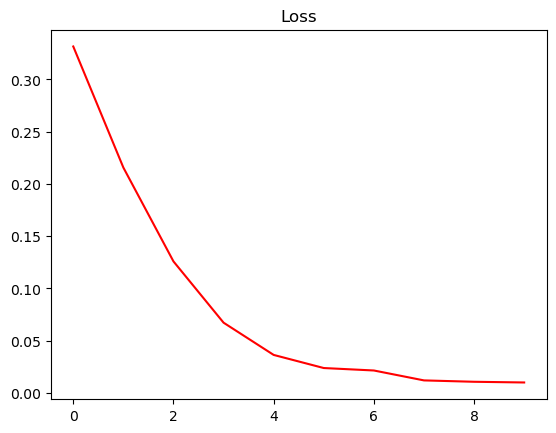

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

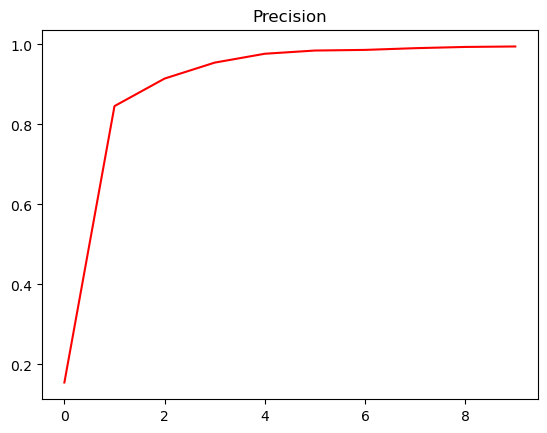

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

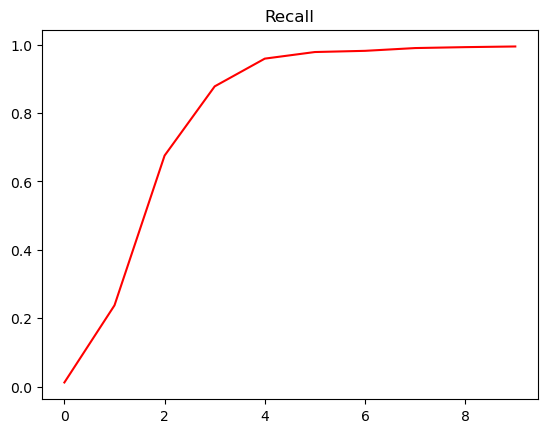

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

## Test model

In [18]:
X_test, y_test = test.as_numpy_iterator().next()

In [104]:
def age(num):
    if num <= 11:
        output_number = num + 16
    if num == 12:
        output_number = 28
    return output_number

In [111]:
def pred(arr):
  print(f"số lần nhận diện: {len(arr)}")
  for i, v1 in enumerate(arr):
    print(f"lần {i+1}")
    for j, v in enumerate(v1):
        if v > 0.5:
          p = round(float(v), 2)*100
          print(f"kết quả: {age(j)} tuổi - {p}%")

In [112]:
pred(y_test)

số lần nhận diện: 1
lần 1
kết quả: 19 tuổi - 100.0%


In [97]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 26ms/step


In [98]:
yhat

array([[5.5308646e-19, 2.3664072e-17, 1.9792316e-15, 1.0000000e+00,
        4.8332444e-18, 2.1593388e-15, 2.4712275e-18, 2.1327493e-15,
        6.7560698e-17, 1.5245116e-20, 3.4489334e-20, 7.6479613e-15]],
      dtype=float32)

In [99]:
pred(yhat)

số lần nhận diện: 1
lần: 1
kết quả: 3(100.0%)


## Chuyển file mp3 sang wav

In [25]:
def load_mp3_16k_mono(filename):
    res = tfio.audio.AudioIOTensor(filename)
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

## Test model với dữ liệu ngoài

In [34]:
mp3 = ('C:/Users/ASUS TUFF/Desktop/Python_pj/Data/VoiceGenderClassification/Single_test/y2meta.com - Female Voice Saying Hello - Sound Effect(HD) (128 kbps).mp3')

In [41]:
wav = load_mp3_16k_mono(mp3)

In [42]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [43]:
samples, index = audio_slices.as_numpy_iterator().next()

In [44]:
samples.shape

(1, 48000)

In [29]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [45]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [113]:
yhat = model.predict(audio_slices)
print('len:', len(yhat))
pred(yhat)

1/1 [==============================] - 0s 216ms/step
len: 3
số lần nhận diện: 3
lần 1
lần 2
kết quả: 19 tuổi - 91.0%
lần 3
kết quả: 22 tuổi - 80.0%


## Save model

In [ ]:
# model.save('VoiceClassification.h5')

## Load model

In [ ]:
# from keras.models import load_model
# model = load_model('VoiceClassification.h5')